# networkx Part 3 : Node and edge attributes

<font color='blue'><b>Goals of this notebook:</b></font>
Learn how to manipulate graphs with edge/arc or node attributes.

<font color='blue'><b>Python packages required:</b></font>
`networkx`

<font color='blue'><b>Prerequisites:</b></font>
Know how to create and draw graphs and digraphs (see parts 1 and 2 of this tutorial).

<font color='blue'><b>Additional resources:</b></font> 
For more on networkx including examples and tutorials, see https://networkx.github.io/documentation/stable/.

We have seen how to create graphs and digraphs.
These structures capture the relationships between different objects. 
However, it is often helpful to add extra attributes to these objects and their relationships. 
For example, suppose we use a graph to represent roads between major cities. 
It might be useful to keep track of how many people live in each city and the travel time between cities. 
We call these properties <font color='blue'><b>node and edge attributes.</b></font> 

Let us use cities as an example to illustrate node and edge attributes in `networkx`.
Consider Berlin, London, and Zurich. The following tables give the population (in millions of people) and flight time (in hours) between these cities.

$$
\begin{array}{ccc}
\text{Population} & &\text{Travel time}\\
\begin{array}{c|c}
\text{Berlin} & 3.748\\
\text{London} & 8.825 \\ 
\text{Zurich} & 0.415
\end{array}
&
\quad
&
\begin{array}{c|c|c|c}
& \text{Berlin} & \text{London} & \text{Zurich}\\
\hline
\text{Berlin} & -- & 1.8 & 1.5 \\
\text{London} & 1.8 &-- & 1.7 \\ 
\text{Zurich} & 1.5 &  1.7 & --
\end{array}
\end{array}
$$

We will create a graph using this data. 

Run the following line of code to import the proper package and create an empty graph.

In [1]:
# Import networkx and run the magic command for later inline drawings
import networkx as nx
%matplotlib inline

# Create an empty graph
G = nx.Graph()

### Adding a node attribute

If we want to add a node with an attribute to `G`, then we use the command

`G.add_node(node_label, attribute_name = attribute_value)`

There are three parts to this command:

`node_label` : This is the usual node label that we are familiar with.

`attribute_name` : This is the name of the particular attribute. For example, if we want to use the attribute `population`, then we would replace `attribute_name` by `population`.

`attribute_value` : This is the value of the attribute that we give to this node. For example, for Berlin we will replace `attribute_value` by `3.748`.

We can use the command `G.add_node_from()` to add many nodes at once.
We can still use this command with attributes using the following command:

`G.add_nodes_from([(node1, {"attribute_name" : attribute_value1}), 
                   (node2, {"attribute_name" : attribute_value2}),...])`

<font color='red'><b>Note:</b></font>
The command `G.add_node()` does not require quotation marks around the attribute name nor does it need the brackets `{}`. 
However, `G.add_nodes_from` does need quotation marks and `{}`. A node can have multiple attributes, and when we add multiple nodes at one time we use the quotation marks and the `{}` brackets to appropriately organize everything for Python.

Run the following code to add a node for `Berlin, London`, and `Zurich` with the `population` attribute.

In [2]:
# Add one node
G.add_node("Berlin", population = 3.748)

# Add many nodes
G.add_nodes_from([("London", {"population" : 8.825}),
                  ("Zurich", {"population" : 0.415})])

We can view a node's attribute using the command

`G.nodes[node_label]["attribute_name"]`

Notice the quotation marks around `attribute_name`.

If we want to access all of the attributes, then we can use 

`nx.get_node_attributes(G, "attribute_name")`

Run the following code to print the population of different cities.

In [3]:
# Print each city's population individually
for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people.')

# Print each city's population at once 
city_pop = nx.get_node_attributes(G, "population")

print(f'The populations are {city_pop}.')

Berlin has 3.748 million people.
London has 8.825 million people.
Zurich has 0.415 million people.
The populations are {'Berlin': 3.748, 'London': 8.825, 'Zurich': 0.415}.


### Adding an edge attribute

Adding edge attributes are done in the same way as node attributes except we use the commands `G.add_edge()` and `G.add_edges_from()`.
If we want to add an edge with attribute `travel_time` between `Berlin` and `London`, then we use the command

`G.add_edge("Berlin", "London", travel_time = 1.8)`

If we want to add multiple edges with attribute `travel_time`, then we use the command

`G.add_edges_from([("Berlin", "Zurich", {"travel_time": 1.5}) , 
                   ("London", "Zurich", {"travel_time": 1.7}) ] )`

We can access an edge attribute using the command 

`nx.get_edge_attributes(G, "attribute_name")`

Run the following code to add edges between each city with the `travel_time` attribute.

In [4]:
# Add one edge
G.add_edge("Berlin", "London", travel_time = 1.8)

# Add multiple edges
G.add_edges_from([("Berlin", "Zurich", {"travel_time": 1.5}) , 
                  ("London", "Zurich", {"travel_time": 1.7}) ] )

# Print the edge travel times
times = nx.get_edge_attributes(G, "travel_time")

print(f'The travel times are {times}.')

The travel times are {('Berlin', 'London'): 1.8, ('Berlin', 'Zurich'): 1.5, ('London', 'Zurich'): 1.7}.


### Editing attributes 

We can also adjust the attributes of a node or an edge.
If we want to change the popluation of `Berlin` to `3.6`, then we can use the command 

`G.nodes["Berlin"]["population"] = 3.6`

If we want to change the travel time between `London` and `Zurich` to `1.75`, then we can use the command 

`G.edges[("London","Zurich")]["travel_time"] = 1.75`

Run the following code to update these attribute values and reprint everything.

In [5]:
# Update Berlin's population
G.nodes["Berlin"]["population"] = 3.6

for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people.')
    
# Update travel time from London to Zurich
G.edges[("London","Zurich")]["travel_time"] = 1.75
        
# Print the edge travel times         
times = nx.get_edge_attributes(G, "travel_time")

print(f'The travel times are {times}.')

Berlin has 3.6 million people.
London has 8.825 million people.
Zurich has 0.415 million people.
The travel times are {('Berlin', 'London'): 1.8, ('Berlin', 'Zurich'): 1.5, ('London', 'Zurich'): 1.75}.


Great! Now you can run graph algorithms that have node and edge attributes. 
Many graphs have multiple node and edge attributes. 
We can simply add these extra attributes in the same way as we added the attributes `population` and `travel_time`.

Let's practice node and edge attributes with a few examples. The examples will also show us how to add multiple attributes.

#### Maximum s-t flows

Let's solve a maximum s-t flow problem.
In a maximum flow problem, we are given a digraph where each arc has an attribute called `capacity`.
We will use the following digraph `H` in this example. It is not important for the example how we make this digraph.
Simply run the following commands to create `H` with arc attributes called `capacity`. 

In [6]:
# Created an empty graph
H = nx.DiGraph()

# Add the arcs
for i in range(1, 12):
    H.add_edge(i, i+1, capacity = 2*i)  
    
    if i <=8:
        H.add_edge(i, i+4, capacity = i*i-10*i+25) 

# Add node positions
node_pos = nx.circular_layout(H)

It would be nice to draw `H` with the capacities on each arc. 
In order to do this, we first draw our graph with the usual command

`nx.draw(H, with_labels = True, pos = node_pos, 
            node_color = 'lightblue', arrowsize = 20)`

We now draw our arc attributes on top of this graph using the command

`edge_draw = nx.draw_networkx_edge_labels(H, pos = node_pos, 
                                             edge_labels = nx.get_edge_attributes(H, 'capacity'))`

This command has four parts:

`H` : This is the name of the graph.

`pos = node_pos` : This says where we draw the arc attribute. If we use the same position as for the nodes, then `networkx` will draw the attriute in the middle of the arc.

`edge_labels = nx.get_edge_attributes(H, 'capacity')` : We choose to draw the `capacity` arc attribute.

`edge_draw = ... ` : The `nx.draw_networkx_edge_labels` returns the attribute value drawn on the arcs. 
We need to store this dictionary otherwise it will be printed to the screen. This is why we use `edge_draw = ...`.

Run the following commands to visualize `H` with capacities.

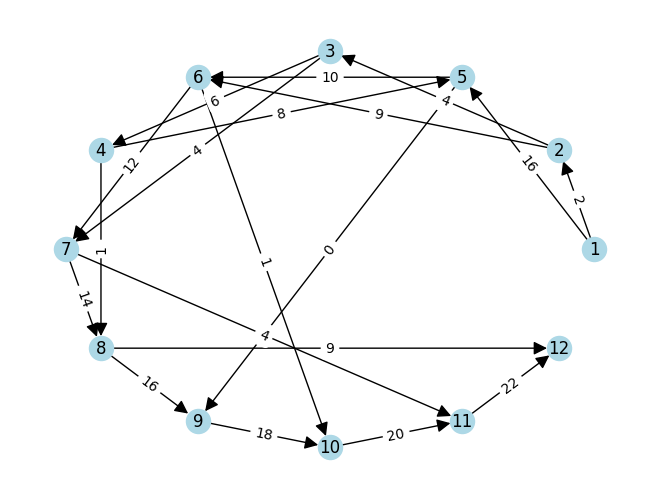

In [7]:
# Draw H
nx.draw(H, with_labels = True, pos = node_pos, 
        node_color = 'lightblue', arrowsize = 20)

# Draw the arc labels
edge_draw = nx.draw_networkx_edge_labels(H, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(H, 'capacity'))

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

Now that we have our digraph with arc capacities, we can run a maximum s-t flow algorithm.
Suppose we want to run a maximum s-t flow in `H` with s=1 and t = 12 using the arc attributes named 'capacity' as capacities for the network flow problem.
The command to run this algorithm is simply 

`total_flow, edge_flow = nx.maximum_flow(H, 1, 12, capacity='capacity')`. 

<font color='red'><b>Note:</b></font> It might seem redundant to use the input `capacity='capacity'`. It turns out that if arcs have an attribute named `capacity`, then the `nx.maximum_flow` function will use these per default and we do not need to add the input `capacity='capacity'`. However, if for some reason we choose to label the capacity attribute with another name like `Cap`, then we would need to specify `capacity='Cap'`.

This command returns two things: 

`total_flow` : the total value of the flow.

`edge_flow` : a dictionary containing the value of the flow on each arc. In order to access the flow on an arc `e`, we use the command `edge_flow[e[0]][e[1]]`.

Run the following command to find a maximum s-t flow in `H` with s=1 and t = 12.  

In [8]:
# Find a max s-t flow in H
total_flow, edge_flow = nx.maximum_flow(H, 1, 12, capacity='capacity')

Now we have the information about our flow! Let's print it out.

We can do this by adding a new arc attribute called `flow` using the values from `edge_flow`.
The `flow` attribute has not yet been created, but we can simply add this attribute to each arc `e` using the command 

`H.edges[e]['flow'] = edge_flow[e[0]][e[1]]` 

as if the attribute was there! 
Python will read this command and automatically create a new arc attribute called `flow`.

Run the following commands to print the flow results.

The total value of the flow is 12.



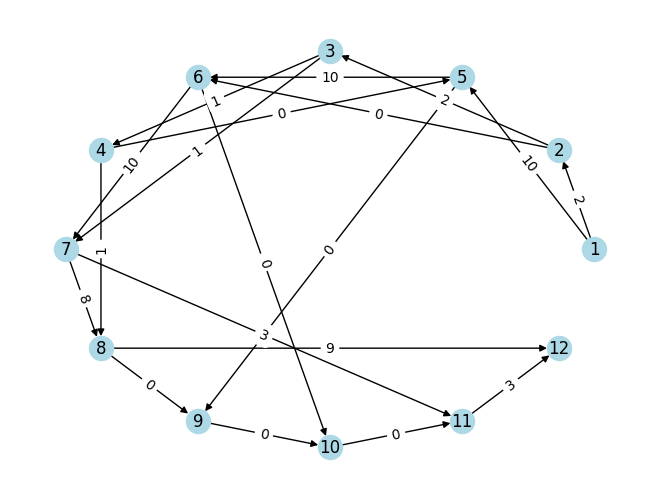

In [9]:
# Print the results 
print(f'The total value of the flow is {total_flow}.\n')

# Add a new arc attribute called flow
for e in H.edges:
    H.edges[e]['flow'] = edge_flow[e[0]][e[1]]

# Draw H with the flow
nx.draw(H, with_labels=True, pos = node_pos, 
        node_color = 'lightblue')

edge_draw = nx.draw_networkx_edge_labels(H, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(H, 'flow'))

#### Example: Triangles with specific nodes

We have seen how to find triangles in graphs.
Assume each node represents a student who studies medicine, law, or art. 
Suppose that the professor wants to find three students who know each other and who study different things.
Mathematically, we want to find a triangle made of a medical student, a law student, and an art student.
For this example, we will use the premade icosahedral graph in `networkx`. 

<font color='red'><b>Note:</b></font> `networkx` has a collection of pre-made graphs that we can load. For more pre-made graphs, see https://networkx.github.io/documentation/networkx-1.10/reference/generators.html?highlight=social.

The students in this graph will be denoted by `0` through `11`, and the node attribute will be called `study`.

Run the following code to generate the graph for this example. We have arbitrarily chosen each student's area of study.

Students [0, 2, 7, 6] study medicine.
Students [3, 9] study law.
Students [1, 4, 5, 8, 10, 11] study art.


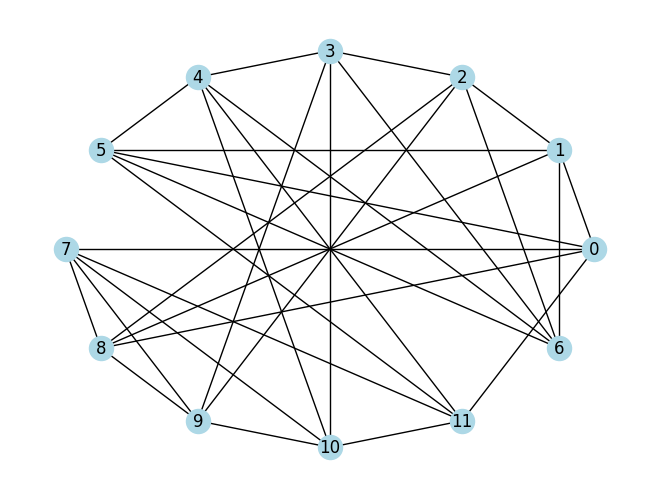

In [10]:
# Load a pre-made graph from networkx
K = nx.icosahedral_graph()

# Create node attribute 'study'
for i in range(0, 12):
    if i % 6 == 0 or i % 5 == 2:
        K.nodes[i]["study"] = "medicine"
    elif i % 6 == 3:
        K.nodes[i]["study"] = "law"
    else:
        K.nodes[i]["study"] = "art"

# Print the student's area of study
study_att = nx.get_node_attributes(K,"study")

for area_of_study in ["medicine","law","art"]:
    print(f'Students {[key for key in K.nodes if study_att[key] == area_of_study]} study {area_of_study}.')

# Draw the graph
node_pos_K = nx.circular_layout(K)

nx.draw(K, with_labels = True, pos = node_pos_K, 
        node_color = 'lightblue')

We can loop through all triples of points and check if they are a proper triangle.

Run the following code to see if the professor can find a suitable triangle of students. 

In [11]:
# Import the itertools to quickly loop through triples
from itertools import combinations

# Loop through triples
for t in combinations(K.nodes,3):
    
    # Check if the edges form a proper triangle
    if set(combinations(t,2)).issubset(K.edges) and\
           {K.nodes[n]["study"] for n in t} == {"medicine","law","art"}:
        
        print(f'The professor can choose students {t}.')
        

The professor can choose students (2, 8, 9).
The professor can choose students (3, 4, 6).
The professor can choose students (7, 8, 9).
The professor can choose students (7, 9, 10).


## Conclusions

Most of the graph algorithms in `networkx` use graphs or digraphs with attributes. 
If you would like to run an algorithm or create a specific type of graph in Python, it is recommended that you look at the `networkx` documentation to check if there is already a command for it!